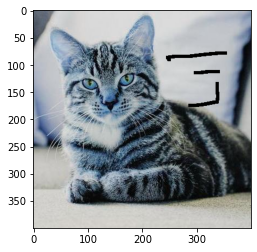

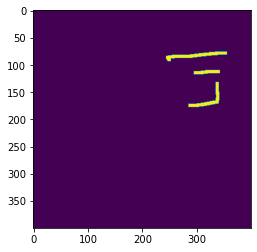

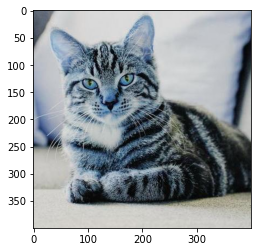

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#open the image
img=cv2.imread('dimage_damaged.png')
plt.imshow(img)
plt.show()
#load the mask
mask=cv2.imread('dimage_mask.png',0)
plt.imshow(mask)
plt.show()
#inpaint 
dst=cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
#write the output
cv2.imwrite('dimage_inpainted.png',dst)
plt.imshow(dst)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)

In [7]:
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(iamge,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax1.axis('off')

In [8]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17332\212511461.py:7: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,mask,multichannel=True)


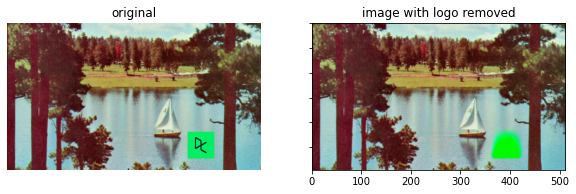

In [9]:
image_with_logo=plt.imread('imlogo.png')
#intitalize the mask
mask=np.zeros(image_with_logo.shape[:-1])
#set the pixels where the logo is to 1
mask[210:272,360:425]=1
#apply inpainting to remove the logo
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,mask,multichannel=True)
#show the original and logo removed images
plot_comparison(image_with_logo,image_logo_removed,'image with logo removed')

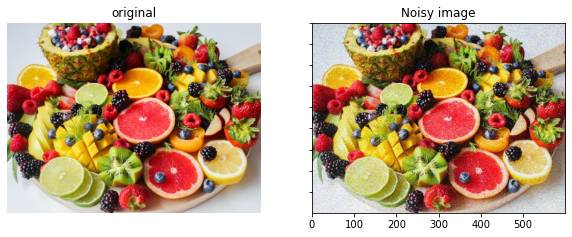

In [12]:
from skimage.util import random_noise
fruit_image=plt.imread('fruitts.jpeg')
#add noise to the image 
noisy_image=random_noise(fruit_image)
#show the original and resulting image
plot_comparison(fruit_image,noisy_image,'Noisy image')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17332\531171859.py:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)


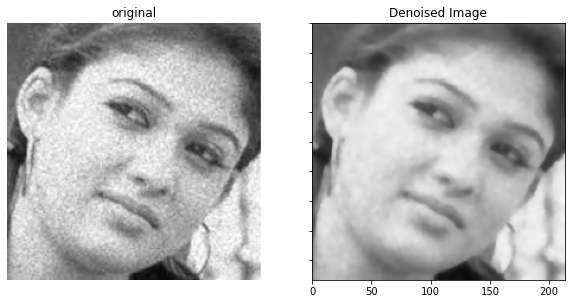

In [16]:
from skimage.restoration import denoise_tv_chambolle
noisy_image=plt.imread('noisy.jpg')
#apply total variation filter denoising
denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)
#show the noisy and denoised iamge
plot_comparison(noisy_image,denoised_image,'Denoised Image')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17332\2910261909.py:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image=denoise_bilateral(landscape_image,multichannel=True)


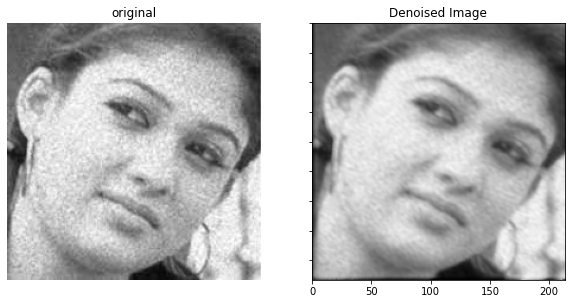

In [18]:
from skimage.restoration import denoise_bilateral
landscape_image=plt.imread('noisy.jpg')
#apply bilateral filter denoising
denoised_image=denoise_bilateral(landscape_image,multichannel=True)
#show originaland resulting images
plot_comparison(landscape_image,denoised_image,'Denoised Image')

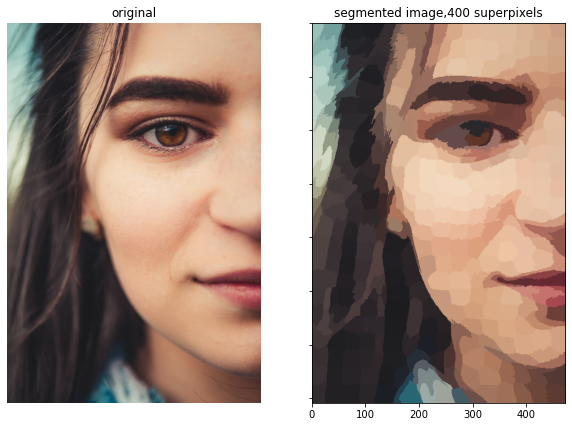

In [19]:
from skimage.segmentation import slic
from skimage.color import label2rgb
face_image=plt.imread('face.jpg')
#obtain the segmentation with 400 regions
segments=slic(face_image,n_segments=400)
#put segments on the top of original iamge to compare
segmented_image=label2rgb(segments,face_image,kind='avg')
#show the segmented image
plot_comparison(face_image,segmented_image,'segmented image,400 superpixels')

In [40]:
def show_image_contour(image,contours):
    plt.figure()
    for n,contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
    plt.imshow(image,interpolation='nearest',cmap='gray_r')
    plt.title('contour')
    plt.axis('off')

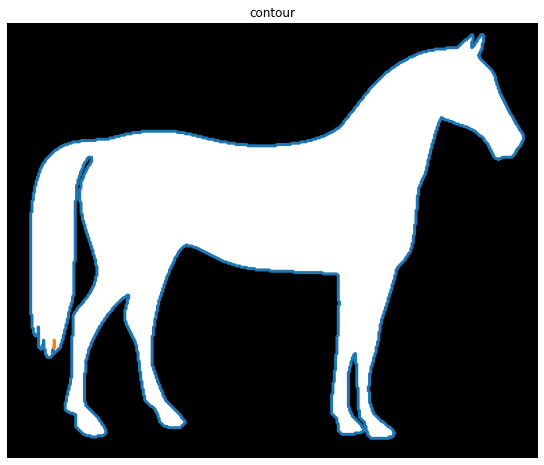

In [41]:
from skimage import measure,data
#obtain the horse image
horse_image=data.horse()
#find the contour with a constant level of 0.8
contours=measure.find_contours(horse_image,level=0.8)
#shows the image with contours found
show_image_contour(horse_image,contours)

In [1]:
from skimage.io import imread 
from skimage.filters import threshold_otsu

image_dices = imread('diceimg.png')

# Make the image grayscale
image_dices = color.rgb2gray(image_dices)

#Obtain the optimal thresh value 
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary=image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours (binary, level=0.8)

# Show the image
show_image_contour (image_dices, contours)

NameError: name 'color' is not defined

In [2]:
# Create List with the shape of each contour 
shape_contours = [cnt.shape[0] for cnt in contours]

#Set 50 as the maximum size of the dots shape 
max_dots_shape = 50

#Count dots in contours excluding bigger than dots size 
dots_contours = [cnt for cnt in contours if np.shape(cnt) [0] < max_dots_shape]

#Shows all contours found 
show_image_contour (binary, contours)

#Print the dice's number
print('Dices dots number: {}.'.format(len (dots_contours)))

NameError: name 'contours' is not defined